Simple Linear Regression

Predicting the percentage of marks that a student scores based upon the number of hours they have studied.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/ML data/student_scores.csv')
dataset.shape

(25, 2)

In [6]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
dataset.describe()
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

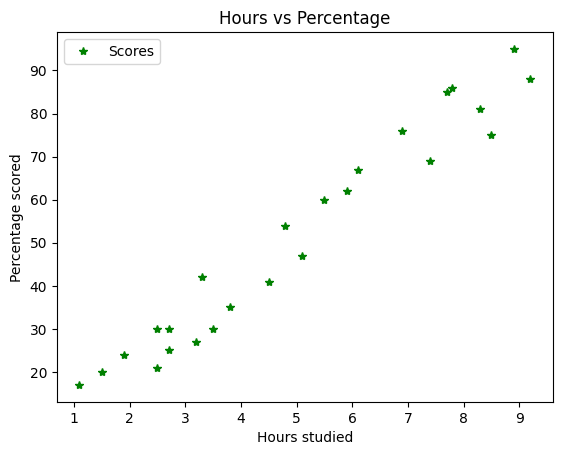

In [8]:
dataset.plot(x='Hours', y='Scores', style='*', c='g')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show();

In [9]:
# prepare my data
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,1]

In [10]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [11]:
X.shape

(25, 1)

In [12]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [13]:
y.shape

(25,)

In [15]:
np.random.rand(3,2)

array([[0.12662724, 0.93072322],
       [0.76988883, 0.65919706],
       [0.18049834, 0.6894673 ]])

In [16]:
np.random.seed(0)
np.random.rand(3,2)

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411]])

In [17]:
np.random.seed(990)
np.random.rand(3,2)

array([[0.9806089 , 0.26989058],
       [0.09874419, 0.42379487],
       [0.11342195, 0.61825621]])

In [18]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
X_train.head()

,Hours
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7


In [20]:
y_train.head()

24    86
23    76
14    17
1     47
10    85
Name: Scores, dtype: int64

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Intercept:",regressor.intercept_)

Intercept: 1.9322042531516601


In [ ]:
print("Slope:",regressor.coef_)

Slope: [9.94167834]


y = 9.94167834 * x + 1.932204253151646 

In [ ]:
9.94167834 * 5.5 + 1.932204253151646

56.611435123151644

In [ ]:
9.91 * 6.9 + 2.018

70.397

In [ ]:
# Predictions

y_pred = regressor.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [ ]:
y_test

5     20
2     27
19    69
16    30
11    62
22    35
17    24
Name: Scores, dtype: int64

In [ ]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [ ]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805


In [ ]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.9367661043365056


In [ ]:
type(float((metrics.r2_score(y_test, y_pred))))

float

In [ ]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: 0.9156881391153409


Multiple Linear Regression:

Predict the gas consumption (in million of gallons) in 48 US states based upon the gas taxes, per capita income, paved highways (in miles), and the proportion of population that has driving license.

In [22]:
dataset = pd.read_csv("/content/drive/MyDrive/ML data/petrol_consumption.csv")

In [ ]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


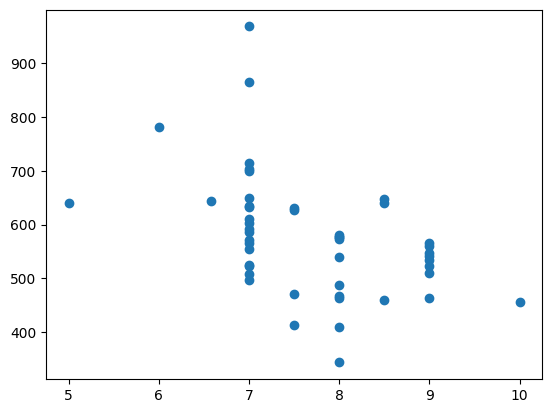

In [23]:
plt.scatter('Petrol_tax','Petrol_Consumption', data=dataset);

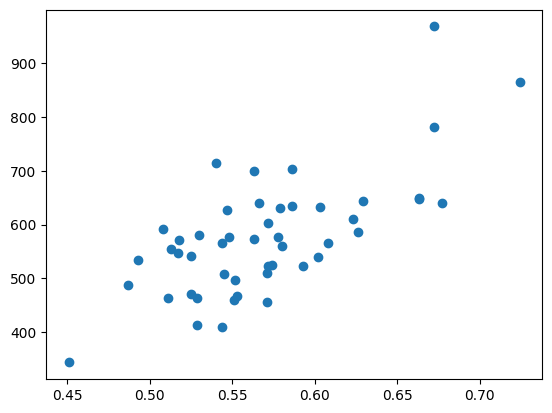

In [24]:
plt.scatter('Population_Driver_licence(%)','Petrol_Consumption', data=dataset);

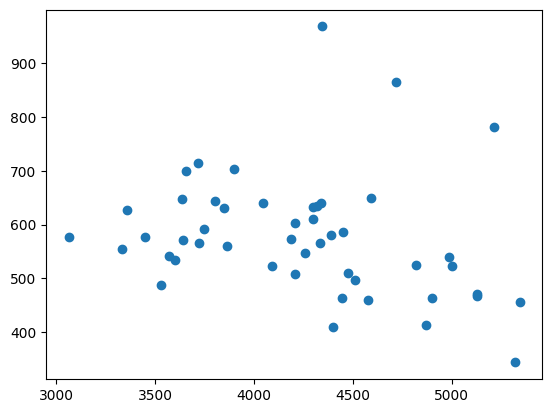

In [25]:
plt.scatter('Average_income','Petrol_Consumption', data=dataset);

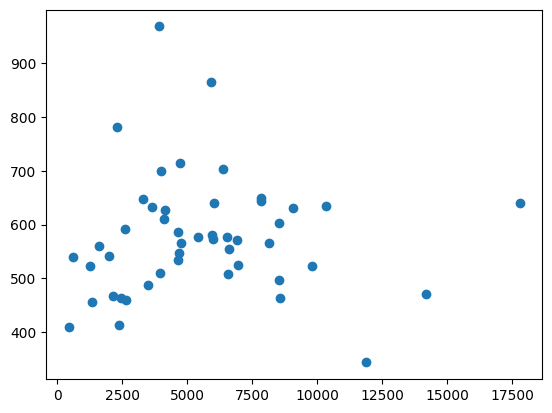

In [26]:
plt.scatter('Paved_Highways','Petrol_Consumption', data=dataset);

In [27]:
dataset.shape

(48, 5)

In [28]:
dataset.size

240

In [29]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [30]:
X = dataset.drop(['Petrol_tax','Petrol_Consumption','Average_income','Paved_Highways'], axis=1)
# X = dataset.drop(['Petrol_Consumption','Average_income','Paved_Highways'], axis=1)
X.head()

,Population_Driver_licence(%)
0,0.525
1,0.572
2,0.580
3,0.529
4,0.544


In [ ]:
y = dataset['Petrol_Consumption']
y.head()

In [32]:
X.shape

(48, 1)

In [33]:
y.shape

(48,)

In [34]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
X_train.shape

(38, 1)

In [36]:
X_test.shape

(10, 1)

In [37]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
regressor.coef_

array([1508.07066816])

In [39]:
regressor.intercept_

-285.66717240517744

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# pd.DataFrame(data, rowname, colname)
coeff_df

,Coefficient
Population_Driver_licence(%),1508.070668


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
29,534,457.811667
4,410,534.723271
26,577,540.755554
30,571,495.513434
32,577,585.997674
37,704,598.062239
34,487,448.763243
40,587,658.385066
7,467,548.295907
10,580,513.610282


In [ ]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 68.4885499524333
Mean Squared Error: 5725.070173663769
Root Mean Squared Error: 75.66419347130959


In [ ]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.022932195966889557


In [ ]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: -0.30275707204414726


Retrain

In [ ]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape

(33, 1)

In [ ]:
X_test.shape

(15, 1)

In [ ]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([1566.75730759])

In [ ]:
regressor.intercept_

-322.1152419439519

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# pd.DataFrame(data, rowname, colname)
coeff_df

,Coefficient
Population_Driver_licence(%),1566.757308


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
29,534,450.296111
4,410,530.200733
26,577,536.467763
30,571,489.465043
32,577,583.470482
37,704,596.004540
34,487,440.895567
40,587,658.674833
7,467,544.301549
10,580,508.266131


In [ ]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 68.73914178304157
Mean Squared Error: 5573.483710556493
Root Mean Squared Error: 74.65576809970207


In [ ]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: -0.07188242337633088


In [ ]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: -0.42917656450177444


Factors

1)Need more data: What we have is just one year data, whereas multiple years data would have helped in getting a better model.

2)Bad Assumptions: We made the assumption that the data has linear relationship, which may not be the case. Visualizing that first would have been a better idea.

3)Poor features The features we used may not have had a high corelation to the values we are trting to predict.

4)Granularity.

Logistic

Student Grant Recommendation

In [40]:
# 1. Data Retrieval
df = pd.read_csv("/content/drive/MyDrive/ML data/student_records.csv")
df

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


# 2. Data preparation

Missing values or errors --> NO

Therefore, we dont need to go through this phase.

In [41]:
# 3. Feature Extraction and Engineering

features_names = ['OverallGrade','Obedient','ResearchScore','ProjectScore']
training_features = df[features_names]
training_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,90,85
1,C,N,85,51
2,F,N,10,17
3,B,Y,75,71
4,E,N,20,30
5,A,Y,92,79
6,B,Y,60,59
7,C,Y,75,33


In [42]:
outcome_name = ['Recommend']
outcome_labels = df[outcome_name]
outcome_labels

,Recommend
0,Yes
1,Yes
2,No
3,No
4,No
5,Yes
6,No
7,No


In [43]:
training_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,90,85
1,C,N,85,51
2,F,N,10,17
3,B,Y,75,71
4,E,N,20,30
5,A,Y,92,79
6,B,Y,60,59
7,C,Y,75,33


In [44]:
numeric_feature_names = ['ResearchScore','ProjectScore']
categorical_feature_names = ['OverallGrade','Obedient']

In [45]:
training_features[numeric_feature_names]

,ResearchScore,ProjectScore
0,90,85
1,85,51
2,10,17
3,75,71
4,20,30
5,92,79
6,60,59
7,75,33


In [46]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# ss, now u go and study these numeric columns --> i.e. fit() over it
ss.fit(training_features[numeric_feature_names])

# ss, now appear for the test
training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])
training_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,0.899583,1.376650
1,C,N,0.730648,-0.091777
2,F,N,-1.803390,-1.560203
3,B,Y,0.392776,0.772004
4,E,N,-1.465519,-0.998746
5,A,Y,0.967158,1.117516
6,B,Y,-0.114032,0.253735
7,C,Y,0.392776,-0.869179


In [47]:
# Engineering Categorical features

training_features = pd.get_dummies(training_features, columns=categorical_feature_names)
training_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,0.899583,1.376650,1,0,0,0,0,0,1
1,0.730648,-0.091777,0,0,1,0,0,1,0
2,-1.803390,-1.560203,0,0,0,0,1,1,0
3,0.392776,0.772004,0,1,0,0,0,0,1
4,-1.465519,-0.998746,0,0,0,1,0,1,0
5,0.967158,1.117516,1,0,0,0,0,0,1
6,-0.114032,0.253735,0,1,0,0,0,0,1
7,0.392776,-0.869179,0,0,1,0,0,0,1


In [60]:
training_features.columns

Index(['ResearchScore', 'ProjectScore', 'OverallGrade_A', 'OverallGrade_B',
       'OverallGrade_C', 'OverallGrade_E', 'OverallGrade_F', 'Obedient_N',
       'Obedient_Y'],
      dtype='object')

In [48]:
numeric_feature_names

['ResearchScore', 'ProjectScore']

In [49]:
list(set(training_features.columns) - set(numeric_feature_names))

['OverallGrade_E',
 'OverallGrade_A',
 'OverallGrade_C',
 'OverallGrade_F',
 'OverallGrade_B',
 'Obedient_Y',
 'Obedient_N']

In [50]:
categorical_engineered_features = list(set(training_features.columns) - set(numeric_feature_names))
categorical_engineered_features

['OverallGrade_E',
 'OverallGrade_A',
 'OverallGrade_C',
 'OverallGrade_F',
 'OverallGrade_B',
 'Obedient_Y',
 'Obedient_N']

In [51]:
training_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,0.899583,1.376650,1,0,0,0,0,0,1
1,0.730648,-0.091777,0,0,1,0,0,1,0
2,-1.803390,-1.560203,0,0,0,0,1,1,0
3,0.392776,0.772004,0,1,0,0,0,0,1
4,-1.465519,-0.998746,0,0,0,1,0,1,0
5,0.967158,1.117516,1,0,0,0,0,0,1
6,-0.114032,0.253735,0,1,0,0,0,0,1
7,0.392776,-0.869179,0,0,1,0,0,0,1


In [52]:
outcome_labels

,Recommend
0,Yes
1,Yes
2,No
3,No
4,No
5,Yes
6,No
7,No


In [53]:
outcome_labels.shape

(8, 1)

In [54]:
y = np.array(outcome_labels['Recommend'])
y

array(['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [59]:
y.shape

(8,)

In [57]:
# 4. Modeling

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(training_features, y )

In [58]:
print(model)

LogisticRegression()


In [61]:
# 5. Model Evaluation

pred_labels = model.predict(training_features)
actual_labels = np.array(outcome_labels['Recommend'])
print(pred_labels)
print()
print(actual_labels)

['Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No']

['Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No']


In [62]:
model.predict([[0.899583,1.376650,1,0,0,0,0,0,1]])

array(['Yes'], dtype=object)

In [63]:
model.predict([[0.5,0.5,1,0,0,0,0,0,1]])

array(['Yes'], dtype=object)

In [64]:
model.predict([[0.5,0.5,1,0,0,0,0,1,0]])

array(['Yes'], dtype=object)

In [65]:
model.predict([[0.5,0.5,0,0,0,0,1,0,1]])

array(['No'], dtype=object)

In [66]:
print(pred_labels,"\n\n",actual_labels)

['Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No'] 

 ['Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No']


In [67]:
# Performance of the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:\n")
accuracy_score(actual_labels,pred_labels)

Accuracy:



1.0

In [68]:
print("Confusion Matrix:\n")
confusion_matrix(actual_labels,pred_labels)

Confusion Matrix:



array([[5, 0],
       [0, 3]])

In [69]:
print("Classification Report:\n")
print(classification_report(actual_labels,pred_labels))

Classification Report:

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [70]:
# Model Deployment

import joblib
import os

if not os.path.exists('Model'):
    os.mkdir("Model")
if not os.path.exists('Scaler'):
    os.mkdir("Scaler")
    
joblib.dump(model,r"Model/cliet_model.pickle")
joblib.dump(ss,r"Scaler/client_ss.pickle")

['Scaler/client_ss.pickle']